# Classification
## Problem statement: Find the species of flower based on different features of given (sepal lenght, petal width etc...).

There are 3 classes/categories of flower present. --> its a classification problem.
since there are more than two classes in the objective to find out, its multi-class classification problem.

Multi-class classification can be easily solved by "Non-parametric techniques" (techniques which have no function/equation).
Example of non-parametric techniques are:
1. Logistic regression
2. K-nearest neighbours (KNN)
3. Decision Trees
4. Random Forest (Ensemble of Decision Trees- collection of Decision Trees)
5. Neural Networks
etc...

I will use above 4 methods to demonstrate the modeling and evaluation of model performance

While exploring above techniques, I will follow full data-analysis life cycle procedure to understand different steps involved.

PS: while the objective is to get an accurate model for this problem, I will highlight all the nuances and wrong steps a typical data scientist would make and will also try to address few critical errors... this will help us to do the course correction and learn from our mistakes.

In [27]:
###-----------load required tools/libraries--------------##G
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [28]:
###----------- Gather data --------------##
 
from sklearn import datasets
iris = datasets.load_iris()


### DAY - 3: DATA-PREPROCESSING

In [29]:
###----------- DATA PRE-PROCESSING--------------##

# extract required info from iris data
data = iris['data']
target = iris['target']
species = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [30]:
'''
Even though all infor is availlable in data, I will use extracted info and combined the data and target.
I will also perform some merging and pre-processing manualy to understand the nuances of this step, and convert the recieved
pre-processed data into raw table formatted data.
'''

#combine data and target for easy visualization
#check shape of data and target
print(data.shape, target.shape)
target = target.reshape(150,1) #convert target to required shape
iris_vis = np.concatenate([data,target],axis=1) #merge

print('\n\nPreprocessed data: ')
iris_vis[:5] #check

(150, 4) (150,)


Preprocessed data: 


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [31]:
#convert data to a pandas dataframe
import pandas as pd
iris_vis = pd.DataFrame(iris_vis)
iris_vis.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_vis.species = iris_vis.species.map(species) #give names to species column values

print('\nRaw data:') # we will use this data mainly for Descriptive analysis... 
iris_vis.head() #check data sample


Raw data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### DAY- 4: DESCRIPTIVE ANALYSIS

In [32]:
###----------- DESCRIPTIVE ANALYSIS--------------##

#check if there are NA values in our data
print("NA values present in data:\n" ,iris_vis.isnull().any())

NA values present in data:
 sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


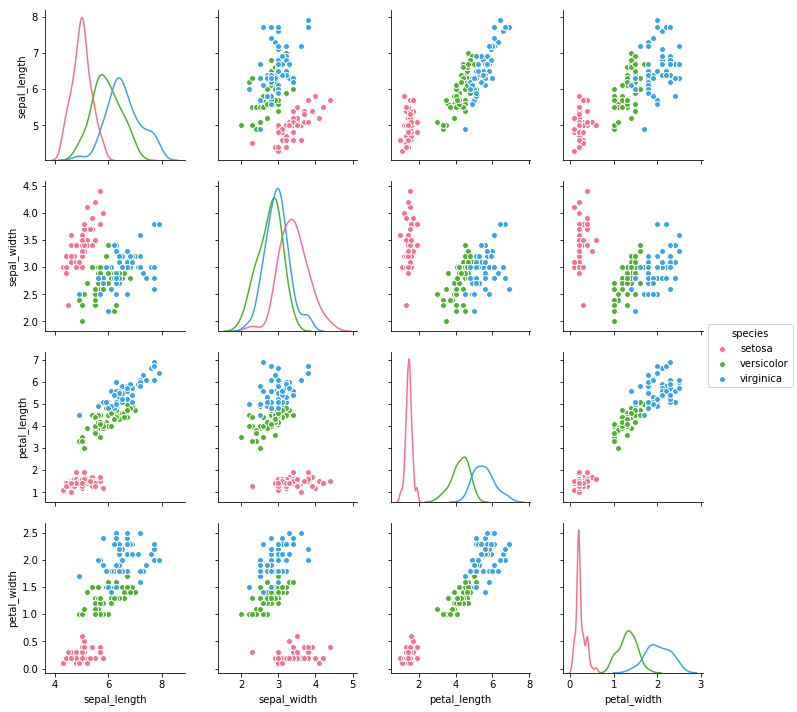

In [33]:
#check how the values of different features are spread with respect to species

sns.pairplot(data=iris_vis, hue="species", diag_kind="kde", palette="husl")

As we can see above plots:
Setosa is clearly differentiable class of flower species as compared to other two species.
Notice that petal_width and petal_lenght is able to clearly separate Setosa among the three categories of species.

In [34]:
#Basic stats of the data
iris_vis.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see a classic example here about the numbers Vs. Plots.
Above plots are giving much better insights than the stats summary.

#### Visualization is much more comprehensible than vanilla numbers.


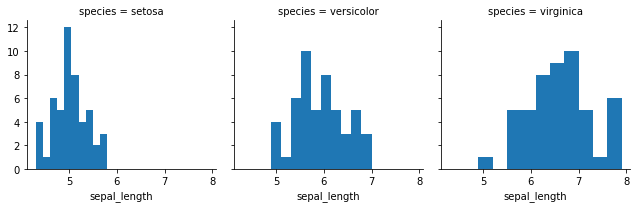

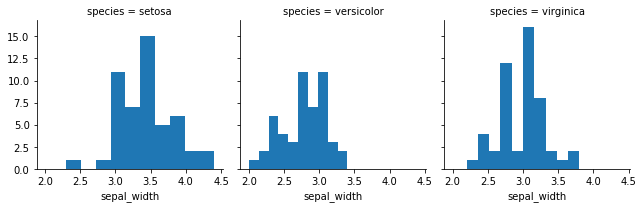

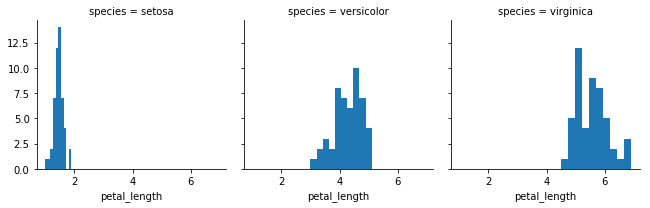

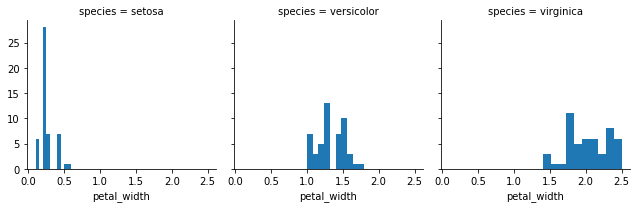

In [35]:
for i in range(4):
    grid = sns.FacetGrid(iris_vis,col='species')
    grid.map(plt.hist,iris_vis.columns.values[i])


# Day 5: Feature eng.




In [36]:
###----------- FEATURE ENGINEERING --------------##

'''
Lets see if we use variable transormation to see the further bi-furcation in Versicolor and Verginica.
We will add a squared parameter of sepal lenght and width and hope that it will be able to separate the species classes in
some highdimension plane (o_0)... might be useful for black-box non-parametric methods...

''' 
iris_vis["sepal_length2"] = iris_vis.sepal_length**2
iris_vis["sepal_width2"] = iris_vis.sepal_width**2

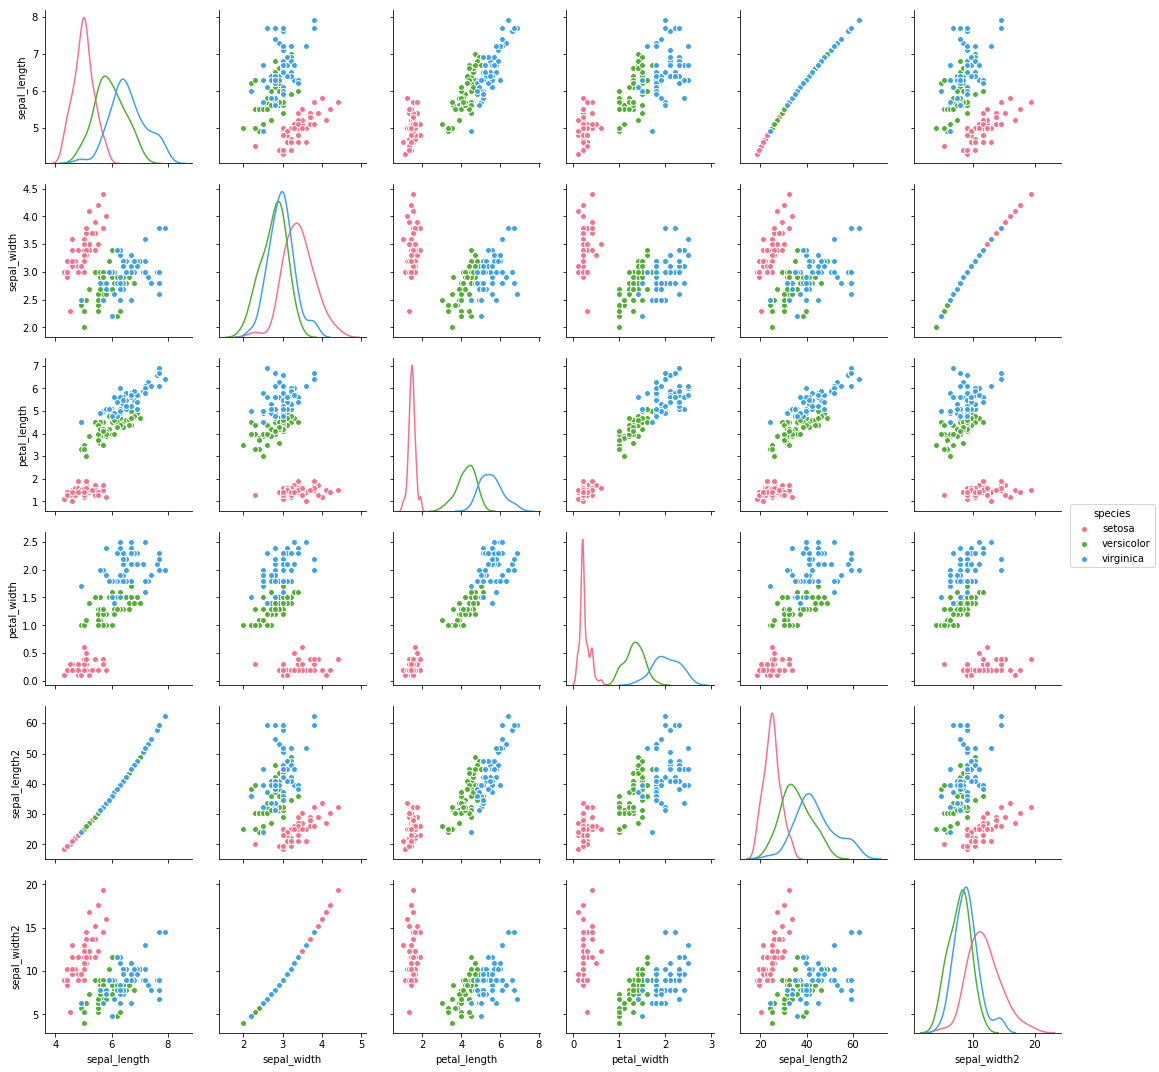

In [37]:
iris_vis.columns
sns.pairplot(data=iris_vis, hue="species", diag_kind="kde", palette="husl")

So the squared feature doesn't help.... :(

lets stick to original features and build a basic classifier for any two species first...
(we can come back to this step for building a model using transformed feature along with original one... as of now lets skip ahead)

In [38]:
iris_vis.drop(['sepal_length2', 'sepal_width2'],axis=1,inplace=True)

#lets map the species to numeric values first for our model to accept it as a response variable...

iris_vis.species = iris_vis.species.map({'setosa':0, 'versicolor':1, 'virginica':2})

#take any two species
iris_subset = iris_vis[(iris_vis.species==0) | (iris_vis.species==1)].copy()
iris_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
sepal_length    100 non-null float64
sepal_width     100 non-null float64
petal_length    100 non-null float64
petal_width     100 non-null float64
species         100 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


# Day 6: Modeling

As per Machine learning literatures/trainers, we should divide the total data into 3 sets for model building and validation 
process:

set 1:  Training (60-70 % data) 

set 2:  Testing (10-20 % data) 

set 3: Validation (10-20% or more)

Training and Testing data can be used in cross-validation format to train and test the model in several iterations of 
cross-validations...
while Validation set should be kept aside (not to be used for training), for final validation once the model is build using 
train+test data (after hyper-parameter tuning is done).

Also, the data preparation phase (outlier imputataion, feature selection etc...) should be performed within each cross-validation iteration to understand the true variability
nature of data.

For this exercise I will skip the validation and CV part, but will try in other complex problems.


In [57]:
##---------------- Predictive analysis ---------------##

#separate predictors and response variable before we do train test partition

X = iris_subset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_subset[['species']]

## divide data into train and validation set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 45)

#check the shape of splitted data
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((67, 4), (33, 4), (67, 1), (33, 1))

In [58]:
# now lets create the model

'''
1. Logistic regression:
   there are different libraries available for building this model... we can use statsmodels or sklearn...

'''
import statsmodels.formula.api as smf

smf_logit = smf.logit('species ~ sepal_length + sepal_width + petal_length + petal_width', iris_subset)
iris_logit = smf_logit.fit()
iris_logit.summary()


PerfectSeparationError: Perfect separation detected, results not available

!!! snap...

we didn't do anything wrong, still we got some weird error...
This error occurs when we have a singular matrix case or non-invertibile matrix... basicaly two or more columns/variables are similar to each other???...
Lets check our variables and the relation between them closely...

In [52]:
c = iris_subset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
#plt.matshow(c)
#sns.heatmap(c, xticklabels=c.columns.values, yticklabels=c.columns.values)
c.style.background_gradient()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.197646,0.812389,0.789613
sepal_width,-0.197646,1,-0.595761,-0.56012
petal_length,0.812389,-0.595761,1,0.978856
petal_width,0.789613,-0.56012,0.978856,1


sepal_length and petal_lenght hav cor of 0.8
petal_width and petal_length hav cor of 0.97


So the problem is: Two or more features are collinear (similar)... this is mulit-collinearity problem which leads to 
singular matrix case and thus the algo is not able to fit... 

lets try some other method and see if they can handle this problem on their own?


In [71]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

dt = DecisionTreeClassifier()
iris_dt = dt.fit(x_train, y_train)

In [80]:
print(confusion_matrix(y_test, iris_dt.predict(x_test)),end='\n')

#print(accuracy_score(y_test, iris_dt.predict(x_test)))

[[19  0]
 [ 0 14]]


:-)
A simple Decision tree predicted all classes accurately!!!!

In [60]:
#random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
iris_rf = rf.fit(x_train, y_train)

In [81]:
#accuracy
confusion_matrix(y_test, iris_rf.predict(x_test))

array([[19,  0],
       [ 0, 14]], dtype=int64)

wow
Decition Tree and RandomForest handled it like butter... let's recall. 
random forest is a tree based ensemble method, which create a group of trees (forest) to build a model then average outs the prediction of all the individual tree (vote of individual tree in case of classification) to give the final outcome.

Since Trees are built on simple rules of data split, the collinearity problem is not hampering the way this algo handles it.

where logistic regression relies on statistics (log-likelihood), randomForest relies on divide and rule (split and predict)